In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
GMARKET_BEST_PRODUCT_URL = "https://corners.gmarket.co.kr/BestSellers"

In [3]:
res = requests.get(GMARKET_BEST_PRODUCT_URL)

In [4]:
soup = BeautifulSoup(res.content, 'html.parser')
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="ko">
<head>
<title>G마켓 - G마켓 베스트</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<meta content="text/javascript" http-equiv="content-script-type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="width=980" id="viewport" name="viewport"/>
<meta content="all" name="ROBOTS"/>
<meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/>
<meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/>
<meta content="(주)이베이코리아" name="author"/>
<meta

In [5]:
#패션의류 상세페이지 카테고리 url
categori_url = "https://corners.gmarket.co.kr/" + soup.select_one("#categoryTabG > li:nth-child(2) > a")['href']

len(categori_url)

67

In [6]:
c_res = requests.get(categori_url)
c_soup = BeautifulSoup(c_res.content, 'html.parser')
c_soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="ko">
<head>
<title>G마켓 - G마켓 베스트&gt;패션의류</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<meta content="text/javascript" http-equiv="content-script-type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="width=980" id="viewport" name="viewport"/>
<meta content="all" name="ROBOTS"/>
<meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/>
<meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/>
<meta content="(주)이베이코리아" name="author"

In [7]:
#가격
import re
price = c_soup.select_one("div.best-list > ul > li > div.item_price > div.s-price > strong > span").text
price = re.sub(r'[^0-9]', '', price)
price

'16500'

In [8]:
import requests
from bs4 import BeautifulSoup
import re


GMARKET_BEST_PRODUCT_URL = "https://corners.gmarket.co.kr/BestSellers"
price_list = []

for i in range(2, 14):

  res = requests.get(GMARKET_BEST_PRODUCT_URL)
  soup = BeautifulSoup(res.content, 'html.parser')

  categori_url = "https://corners.gmarket.co.kr" + soup.select_one(f"#categoryTabG > li:nth-child({i}) > a")['href']

  c_res = requests.get(categori_url)
  c_soup = BeautifulSoup(c_res.content, 'html.parser')

  ca_price_list = []

  for j in range(1,101):
    price = c_soup.select_one(f"div.best-list > ul> li:nth-child({j}) > div.item_price > div.s-price > strong > span").text
    price = re.sub(r'[^0-9]', '', price)
    ca_price_list.append(price)
  price_list.append(ca_price_list)

print(price_list)


[['16500', '39000', '14900', '26000', '19900', '14800', '13950', '11900', '7800', '12500', '18900', '9900', '10000', '11900', '30000', '14900', '16900', '6900', '15900', '39900', '14900', '14900', '22000', '12900', '20900', '29900', '12800', '15900', '27000', '16500', '17800', '19750', '19900', '29000', '14900', '29900', '12900', '39900', '14900', '11900', '12900', '59000', '39000', '13900', '12900', '24900', '24900', '19900', '29900', '10000', '15900', '39000', '12900', '22900', '17900', '8900', '15500', '14900', '14900', '7900', '15900', '7900', '35000', '8900', '19800', '19100', '79000', '11900', '18500', '16900', '18600', '15920', '39000', '29900', '17900', '27000', '15900', '111300', '9900', '29900', '111300', '12900', '12800', '13900', '12900', '21900', '11900', '18000', '23500', '29900', '11900', '15900', '15800', '199500', '29000', '14900', '15900', '12900', '63200', '11900'], ['16900', '19650', '12900', '9500', '10000', '19650', '11700', '19650', '19200', '19650', '9800', '179

In [9]:
import pandas as pd 
catregori_price_df = pd.DataFrame(price_list).transpose()

In [10]:
catregori_price_df.columns = ['패션의류','신발/잡화','화장품/헤어','유아동/출산','식품','생활/주방/건강','가구/침구','스포츠/자동차','컴퓨터/전자','도서/음반','여행','e쿠폰']

In [11]:
catregori_price_df

,패션의류,신발/잡화,화장품/헤어,유아동/출산,식품,생활/주방/건강,가구/침구,스포츠/자동차,컴퓨터/전자,도서/음반,여행,e쿠폰
0,16500,16900,17900,12400,29900,34200,12900,10500,26600,24880,13860,46800
1,39000,19650,26900,34200,18600,17900,25900,29330,18950,26120,219000,46800
2,14900,12900,38690,31230,19440,31230,9900,47650,982800,38640,169000,47000
3,26000,9500,15000,23400,14900,50600,9900,39570,243880,64480,40850,46800
4,19900,10000,41270,9900,19900,15900,14800,15000,156900,14110,243640,95000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,14900,27800,18600,67900,32570,43400,51900,42420,19900,255700,140650,4850
96,15900,49000,19900,11900,57500,12900,13900,37900,140250,49000,73000,50000
97,12900,16800,34900,13200,47900,38610,126650,22900,59900,184000,55000,13500
98,63200,8900,42900,53900,5840,12900,36900,49000,86390,16800,35890,44000


In [12]:
catregori_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   패션의류      100 non-null    object
 1   신발/잡화     100 non-null    object
 2   화장품/헤어    100 non-null    object
 3   유아동/출산    100 non-null    object
 4   식품        100 non-null    object
 5   생활/주방/건강  100 non-null    object
 6   가구/침구     100 non-null    object
 7   스포츠/자동차   100 non-null    object
 8   컴퓨터/전자    100 non-null    object
 9   도서/음반     100 non-null    object
 10  여행        100 non-null    object
 11  e쿠폰       100 non-null    object
dtypes: object(12)
memory usage: 9.5+ KB


In [13]:
catregori_price_df = catregori_price_df.astype(int)

In [14]:
# 평균
catregori_price_df.mean()

패션의류         23771.2
신발/잡화        27172.5
화장품/헤어       28855.8
유아동/출산       33446.2
식품           32193.3
생활/주방/건강     28948.8
가구/침구        39330.4
스포츠/자동차      40950.1
컴퓨터/전자      237588.8
도서/음반        85081.4
여행          146999.6
e쿠폰          42629.3
dtype: float64

In [15]:
#평균 시각화

In [16]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family = "NanumBarunGothic")

In [29]:
plt.rc("font", family="Malgun Gothic")

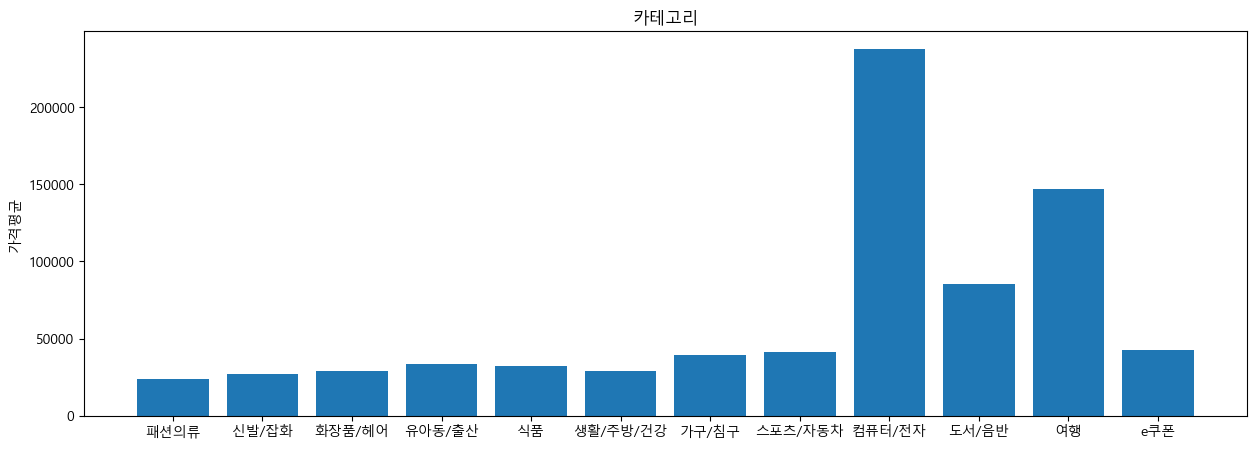

In [30]:
plt.figure(figsize=(15, 5)) 
plt.bar(catregori_price_df.columns,catregori_price_df.mean())
plt.ylabel("가격평균")
plt.title("카테고리")
plt.show()

In [19]:
# 상위50 하위50

In [20]:
upper_price = catregori_price_df.head(int(len(catregori_price_df)*0.5))
lower_price = catregori_price_df.tail(int(len(catregori_price_df)*0.5))

In [21]:
upper_price.mean()

패션의류         19966.0
신발/잡화        21925.4
화장품/헤어       26431.2
유아동/출산       32451.4
식품           30702.0
생활/주방/건강     28253.2
가구/침구        26526.8
스포츠/자동차      34148.0
컴퓨터/전자      262270.6
도서/음반        73272.4
여행          168409.8
e쿠폰          44405.0
dtype: float64

In [22]:
lower_price.mean()

패션의류         27576.4
신발/잡화        32419.6
화장품/헤어       31280.4
유아동/출산       34441.0
식품           33684.6
생활/주방/건강     29644.4
가구/침구        52134.0
스포츠/자동차      47752.2
컴퓨터/전자      212907.0
도서/음반        96890.4
여행          125589.4
e쿠폰          40853.6
dtype: float64

In [27]:
plt.rc("font", family="Malgun Gothic")

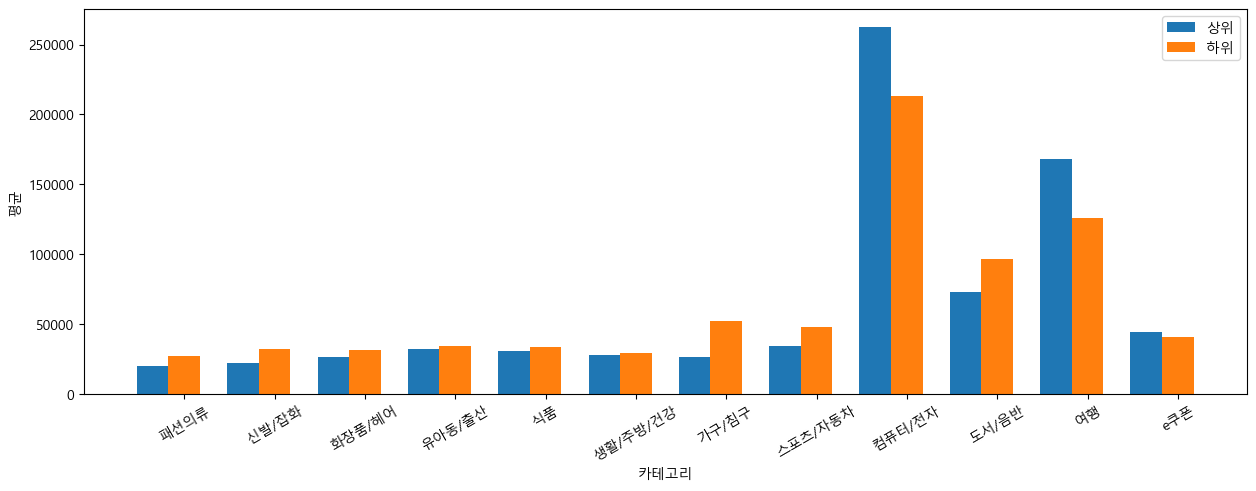

In [28]:
import numpy as np
width = 0.35
nrow = upper_price.mean().shape[0]
idx = np.arange(nrow)


fig, axes = plt.subplots(figsize=(15, 5))

axes.bar(idx - width ,upper_price.mean(), width)
axes.bar(idx ,lower_price.mean(), width)

plt.xticks(idx, catregori_price_df.columns , rotation = 30)

plt.ylabel("평균")
plt.xlabel("카테고리")
plt.legend(["상위","하위"])
plt.show()